In [0]:
import numpy as np 
import pandas as pd
import matplotlib.pyplot as plt
import math as math

%matplotlib inline

In [2]:
train = pd.read_csv("train_1.csv")
#keys = pd.read_csv("key_1.csv")
train.head()

,Page,2015-07-01,2015-07-02,2015-07-03,2015-07-04,2015-07-05,2015-07-06,2015-07-07,2015-07-08,2015-07-09,2015-07-10,2015-07-11,2015-07-12,2015-07-13,2015-07-14,2015-07-15,2015-07-16,2015-07-17,2015-07-18,2015-07-19,2015-07-20,2015-07-21,2015-07-22,2015-07-23,2015-07-24,2015-07-25,2015-07-26,2015-07-27,2015-07-28,2015-07-29,2015-07-30,2015-07-31,2015-08-01,2015-08-02,2015-08-03,2015-08-04,2015-08-05,2015-08-06,2015-08-07,2015-08-08,...,2016-11-22,2016-11-23,2016-11-24,2016-11-25,2016-11-26,2016-11-27,2016-11-28,2016-11-29,2016-11-30,2016-12-01,2016-12-02,2016-12-03,2016-12-04,2016-12-05,2016-12-06,2016-12-07,2016-12-08,2016-12-09,2016-12-10,2016-12-11,2016-12-12,2016-12-13,2016-12-14,2016-12-15,2016-12-16,2016-12-17,2016-12-18,2016-12-19,2016-12-20,2016-12-21,2016-12-22,2016-12-23,2016-12-24,2016-12-25,2016-12-26,2016-12-27,2016-12-28,2016-12-29,2016-12-30,2016-12-31
0,2NE1_zh.wikipedia.org_all-access_spider,18.0,11.0,5.0,13.0,14.0,9.0,9.0,22.0,26.0,24.0,19.0,10.0,14.0,15.0,8.0,16.0,8.0,8.0,16.0,7.0,11.0,10.0,20.0,18.0,15.0,14.0,49.0,10.0,16.0,18.0,8.0,5.0,9.0,7.0,13.0,9.0,7.0,4.0,11.0,...,24.0,14.0,11.0,204.0,14.0,45.0,33.0,28.0,18.0,14.0,47.0,15.0,14.0,18.0,20.0,14.0,16.0,14.0,20.0,60.0,22.0,15.0,17.0,19.0,18.0,21.0,21.0,47.0,65.0,17.0,32.0,63.0,15.0,26.0,14.0,20.0,22.0,19.0,18.0,20.0
1,2PM_zh.wikipedia.org_all-access_spider,11.0,14.0,15.0,18.0,11.0,13.0,22.0,11.0,10.0,4.0,41.0,65.0,57.0,38.0,20.0,62.0,44.0,15.0,10.0,47.0,24.0,17.0,22.0,9.0,39.0,13.0,11.0,12.0,21.0,19.0,9.0,15.0,33.0,8.0,8.0,7.0,13.0,2.0,23.0,...,14.0,15.0,15.0,11.0,20.0,13.0,19.0,621.0,57.0,17.0,23.0,19.0,21.0,47.0,28.0,22.0,22.0,65.0,27.0,17.0,17.0,13.0,9.0,18.0,22.0,17.0,15.0,22.0,23.0,19.0,17.0,42.0,28.0,15.0,9.0,30.0,52.0,45.0,26.0,20.0
2,3C_zh.wikipedia.org_all-access_spider,1.0,0.0,1.0,1.0,0.0,4.0,0.0,3.0,4.0,4.0,1.0,1.0,1.0,6.0,8.0,6.0,4.0,5.0,1.0,2.0,3.0,8.0,8.0,6.0,6.0,2.0,2.0,3.0,2.0,4.0,3.0,3.0,5.0,3.0,5.0,4.0,2.0,5.0,1.0,...,9.0,3.0,5.0,4.0,0.0,1.0,4.0,5.0,8.0,8.0,1.0,1.0,2.0,5.0,3.0,3.0,3.0,7.0,3.0,9.0,8.0,3.0,210.0,5.0,4.0,6.0,2.0,2.0,4.0,3.0,3.0,1.0,1.0,7.0,4.0,4.0,6.0,3.0,4.0,17.0
3,4minute_zh.wikipedia.org_all-access_spider,35.0,13.0,10.0,94.0,4.0,26.0,14.0,9.0,11.0,16.0,16.0,11.0,23.0,145.0,14.0,17.0,85.0,4.0,30.0,22.0,9.0,10.0,11.0,7.0,7.0,11.0,9.0,11.0,44.0,8.0,14.0,19.0,10.0,17.0,17.0,10.0,7.0,10.0,1.0,...,7.0,10.0,7.0,10.0,14.0,17.0,11.0,9.0,11.0,5.0,10.0,8.0,17.0,13.0,23.0,40.0,16.0,17.0,41.0,17.0,8.0,9.0,18.0,12.0,12.0,18.0,13.0,18.0,23.0,10.0,32.0,10.0,26.0,27.0,16.0,11.0,17.0,19.0,10.0,11.0
4,52_Hz_I_Love_You_zh.wikipedia.org_all-access_s...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,14.0,13.0,15.0,14.0,16.0,9.0,178.0,64.0,12.0,10.0,11.0,6.0,8.0,7.0,9.0,8.0,5.0,11.0,8.0,4.0,15.0,5.0,8.0,8.0,6.0,7.0,15.0,4.0,11.0,7.0,48.0,9.0,25.0,13.0,3.0,11.0,27.0,13.0,36.0,10.0


In [3]:
print('num of records:',train.shape[0])

empty_sample = train[train.isnull().any(axis=1)]
print(empty_sample.shape[0])
train.info()

num of records: 32086
7224
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 32086 entries, 0 to 32085
Columns: 551 entries, Page to 2016-12-31
dtypes: float64(550), object(1)
memory usage: 134.9+ MB


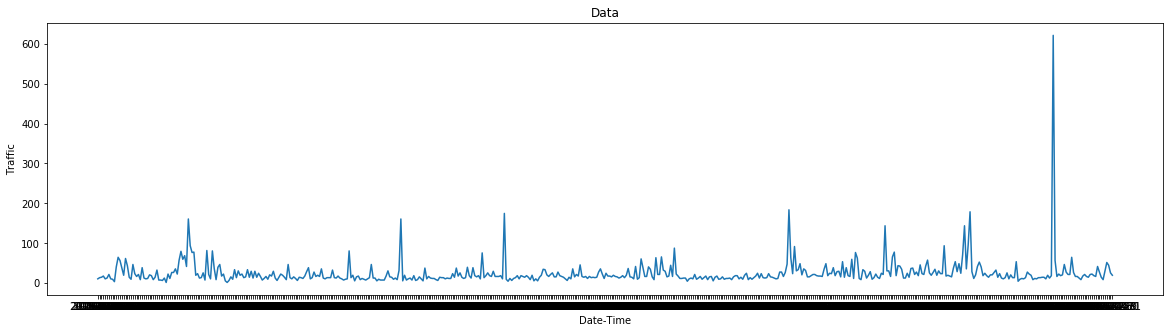

In [4]:
from matplotlib import rcParams
import numpy as np
from matplotlib import pyplot as plt
import matplotlib
rcParams['figure.figsize'] = 20,5
plt.plot(train.loc[1][1:])
plt.xlabel('Date-Time', fontsize=10)
plt.ylabel('Traffic', fontsize=10)
plt.title('Data')
plt.show()

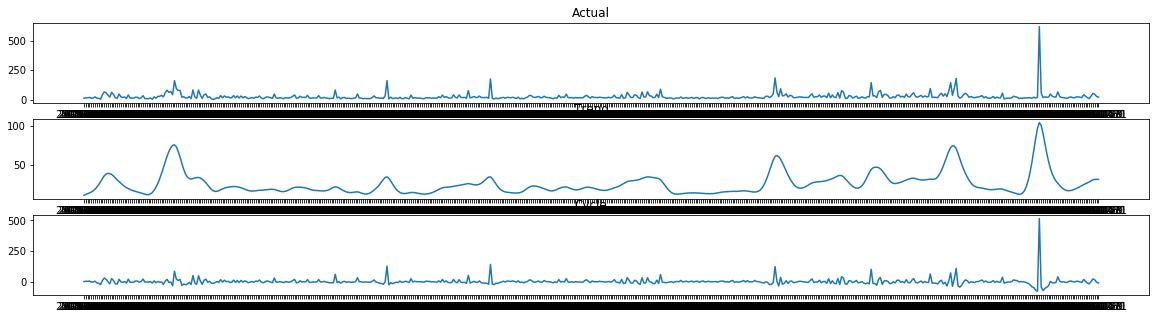

In [5]:
import statsmodels.api as sm
series = train.loc[1][1:]
cycle, trend = sm.tsa.filters.hpfilter(series, 50)
fig, ax = plt.subplots(3,1)
ax[0].plot(series)
ax[0].set_title('Actual')
ax[1].plot(trend)
ax[1].set_title('Trend')
ax[2].plot(cycle)
ax[2].set_title('Cycle')
plt.show()

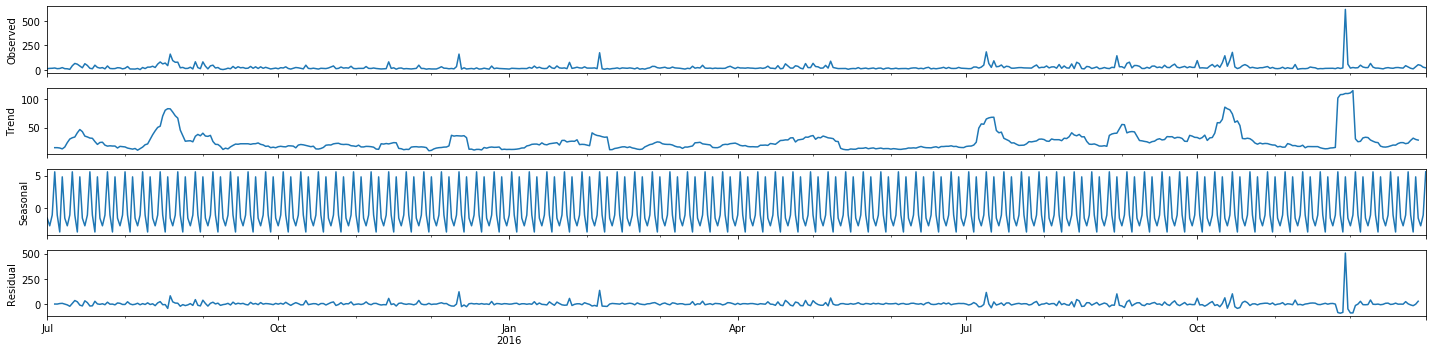

In [6]:
index = pd.to_datetime(series.index)
array = []
for i in range(len(series)):
    array.append(series[i])
array = pd.DataFrame(array)
array.index = index
decomposition = sm.tsa.seasonal_decompose(array) 
decomposition.plot();

/usr/local/lib/python3.6/dist-packages/statsmodels/tsa/stattools.py:541: FutureWarning: fft=True will become the default in a future version of statsmodels. To suppress this warning, explicitly set fft=False.
  warnings.warn(msg, FutureWarning)


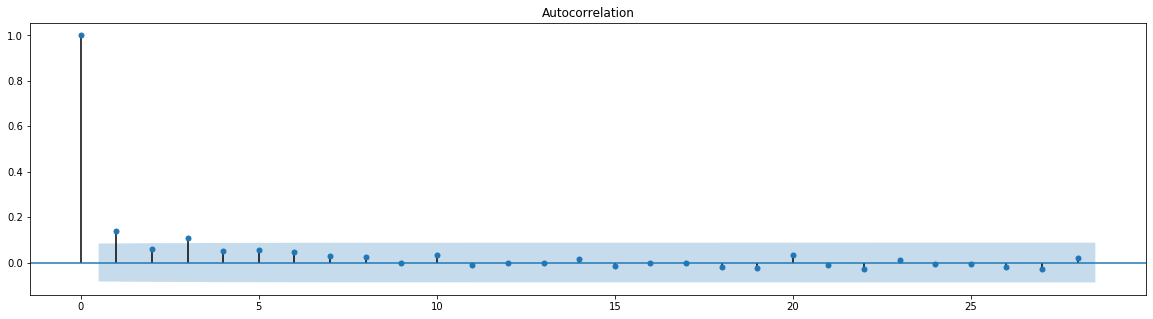

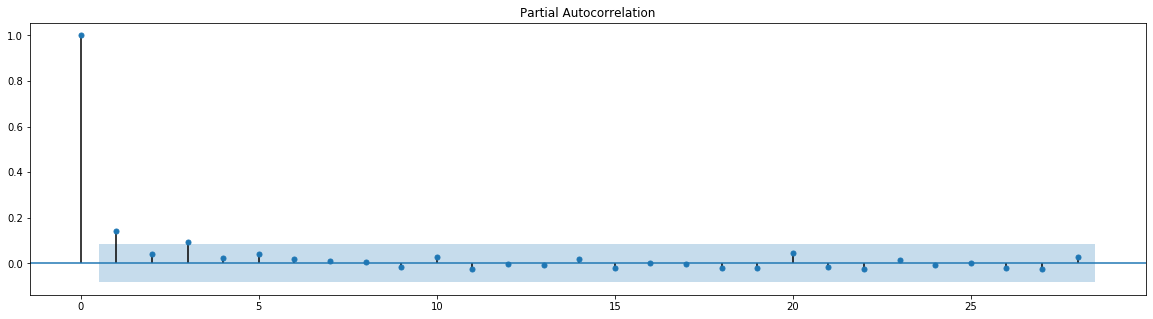

In [7]:
from statsmodels.graphics.tsaplots import plot_acf,plot_pacf
plot_acf(array);
plot_pacf(array);
acf_values= sm.tsa.stattools.acf(series)
pacf_values= sm.tsa.stattools.pacf(series)

Pages Based on Language Analysis

In [8]:
import re
def get_language(page):
    res = re.search('[a-z][a-z].wikipedia.org',page)
    if res:
        return res[0][0:2]
    return 'na'

train['lang'] = train.Page.map(get_language)

from collections import Counter

print(Counter(train.lang))

Counter({'fr': 8546, 'zh': 8431, 'na': 6405, 'en': 4975, 'ru': 3729})


In [9]:
lang_set = {}
lang_set['en'] = train[train.lang=='en'].iloc[:,0:-1]
lang_set['ja'] = train[train.lang == 'ja'].iloc[:, 0:-1]
lang_set['de'] = train[train.lang == 'de'].iloc[:, 0:-1]
lang_set['fr'] = train[train.lang == 'fr'].iloc[:, 0:-1]
lang_set['ru'] = train[train.lang == 'ru'].iloc[:, 0:-1]
lang_set['es'] = train[train.lang == 'es'].iloc[:, 0:-1]
lang_set['no_lang'] = train[train.lang == 'no_lang'].iloc[:, 0:-1]

for key in lang_set:
    print("KEY : ", lang_set[key],"\n")

KEY :                                                      Page  ...  2016-12-31
8357           !vote_en.wikipedia.org_desktop_all-agents  ...         0.0
8358   "Awaken,_My_Love!"_en.wikipedia.org_desktop_al...  ...      1770.0
8359   "European_Society_for_Clinical_Investigation"_...  ...         2.0
8360   "Weird_Al"_Yankovic_en.wikipedia.org_desktop_a...  ...      1098.0
8361      100_metres_en.wikipedia.org_desktop_all-agents  ...       272.0
...                                                  ...  ...         ...
13327  UFC_Fight_Night:_Rodríguez_vs._Penn_en.wikiped...  ...     10362.0
13328  Battle_of_Mosul_(2016–17)_en.wikipedia.org_des...  ...         NaN
13329  Aleppo_offensive_(November–December_2016)_en.w...  ...       834.0
13330  UFC_on_Fox:_Shevchenko_vs._Peña_en.wikipedia.o...  ...      7716.0
13331  Battle_of_Aleppo_(2012–16)_en.wikipedia.org_de...  ...      1690.0

[4975 rows x 551 columns] 

KEY :  Empty DataFrame
Columns: [Page, 2015-07-01, 2015-07-02, 2015-07-03, 2

In [10]:
total_view = {} 
for key in lang_set:
    total_view[key] = lang_set[key].iloc[:, 1:].sum(axis=0) / lang_set[key].shape[0]


for key in lang_set:
    print("KEY : ", key)
    print("\nTotal_Value KEY : \n", total_view[key])

KEY :  en

Total_Value KEY : 
 2015-07-01    4766.932261
2015-07-02    4743.588543
2015-07-03    4238.542714
2015-07-04    4235.251658
2015-07-05    4407.578090
                 ...     
2016-12-27    7705.578090
2016-12-28    7613.645226
2016-12-29    7794.757789
2016-12-30    6807.862111
2016-12-31    6673.631960
Length: 550, dtype: float64
KEY :  ja

Total_Value KEY : 
 2015-07-01   NaN
2015-07-02   NaN
2015-07-03   NaN
2015-07-04   NaN
2015-07-05   NaN
              ..
2016-12-27   NaN
2016-12-28   NaN
2016-12-29   NaN
2016-12-30   NaN
2016-12-31   NaN
Length: 550, dtype: float64
KEY :  de

Total_Value KEY : 
 2015-07-01   NaN
2015-07-02   NaN
2015-07-03   NaN
2015-07-04   NaN
2015-07-05   NaN
              ..
2016-12-27   NaN
2016-12-28   NaN
2016-12-29   NaN
2016-12-30   NaN
2016-12-31   NaN
Length: 550, dtype: float64
KEY :  fr

Total_Value KEY : 
 2015-07-01     707.401708
2015-07-02     710.451088
2015-07-03     680.778493
2015-07-04     721.498128
2015-07-05     695.647788
  

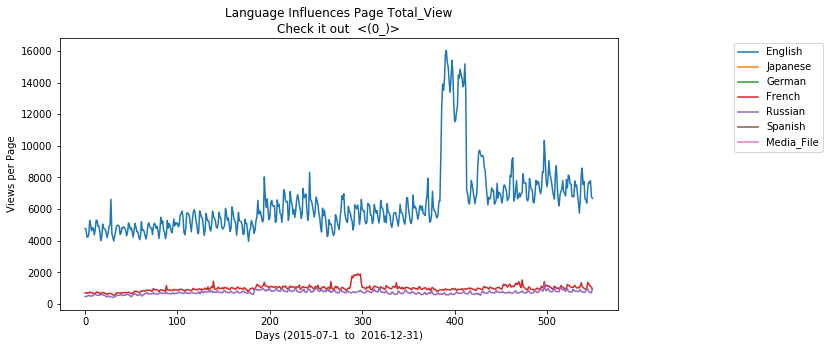

In [11]:
days = [r for r in range(total_view['en'].shape[0])]

# height and width of graph
plt.figure(figsize=(10, 5))
labels={'ja':'Japanese','de':'German','en' : 'English','no_lang':'Media_File','fr':'French','zh':'Chinese',
        'ru':'Russian','es':'Spanish'}

for key in total_view:
    plt.plot(days,total_view[key],label = labels[key])
    

plt.ylabel('Views per Page')
plt.xlabel('Days (2015-07-1  to  2016-12-31)')
plt.title('Language Influences Page Total_View\nCheck it out  <(0_)>')
plt.legend(loc = 'upper left', bbox_to_anchor = (1.2, 1))
plt.show()

In [12]:
from statsmodels.tsa.stattools import adfuller

def test_stationarity(x):

    #Perform Dickey Fuller test    
    result=adfuller(x)
    print('ADF Stastistic: %f'%result[0])
    print('p-value: %f'%result[1])
    pvalue=result[1]
    for key,value in result[4].items():
         if result[0]>value:
            print("The graph is non stationery")
            break
         else:
            print("The graph is stationery")
            break;
    print('Critical values:')
    for key,value in result[4].items():
        print('\t%s: %.3f' % (key, value))
        
test_stationarity(total_view['en'])
test_stationarity(total_view['ja'])
test_stationarity(total_view['de'])

ADF Stastistic: -2.600019
p-value: 0.092993
The graph is non stationery
Critical values:
	1%: -3.443
	5%: -2.867
	10%: -2.570


MissingDataError: ignored

From the above analysis and the decomposition of series. we have identified that the series in Non-Stationary. Attempting log transformation and differencing

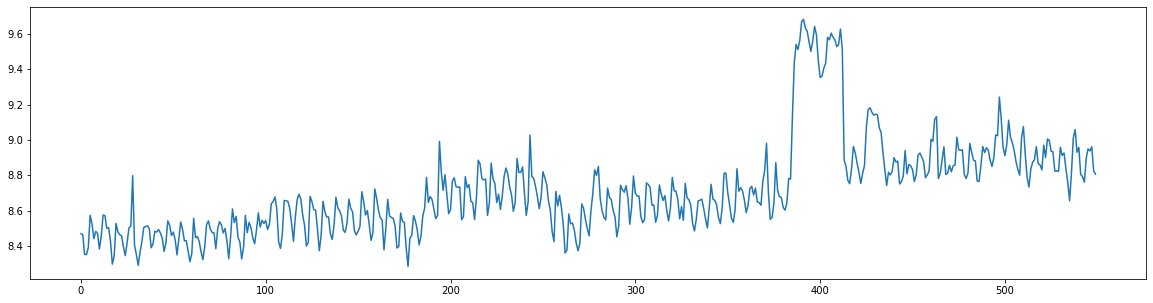

ADF Stastistic: -2.241666
p-value: 0.191472
The graph is non stationery
Critical values:
	1%: -3.443
	5%: -2.867
	10%: -2.570


In [13]:
log_trans = np.log(total_view['en'])
plt.plot(log_trans.values)
plt.show()

test_stationarity(log_trans)

In [14]:
first_order = log_trans.diff()
second_order = first_order.diff()
second_order.dropna(inplace=True)
test_stationarity(second_order)

ADF Stastistic: -12.416811
p-value: 0.000000
The graph is stationery
Critical values:
	1%: -3.443
	5%: -2.867
	10%: -2.570


In [26]:
#train = train.drop('lang',axis = 1)
train = train.drop('Page',axis = 1)
print(train.head())

   2015-07-01  2015-07-02  2015-07-03  ...  2016-12-29  2016-12-30  2016-12-31
0        18.0        11.0         5.0  ...        19.0        18.0        20.0
1        11.0        14.0        15.0  ...        45.0        26.0        20.0
2         1.0         0.0         1.0  ...         3.0         4.0        17.0
3        35.0        13.0        10.0  ...        19.0        10.0        11.0
4         NaN         NaN         NaN  ...        13.0        36.0        10.0

[5 rows x 550 columns]


# Trial of difference models

1) LSTM/RNN model
2) Random Forest Regressor
3) ARIMA

In [0]:
import pandas as pd
import numpy as np
from keras.models import Sequential
from keras.layers import Dense
from keras.layers import LSTM
%matplotlib inline
from matplotlib import pyplot as plt
from sklearn.metrics import mean_squared_error
from math import sqrt
import itertools
import statsmodels.api as sm
from scipy import stats
import warnings
warnings.filterwarnings('ignore')
from sklearn.ensemble import RandomForestRegressor
from matplotlib import rcParams
#train = train.sample(10)

Sequence into multiple samples where each sample has a specified number of time steps and the output is a single time step.

In [0]:
def split_sequence(sequence, n_steps):
	X, y = list(), list()
	for i in range(len(sequence)):
		# find the end of this pattern
		end_ix = i + n_steps
		# check if we are beyond the sequence
		if end_ix > len(sequence)-1:
			break
		# gather input and output parts of the pattern
		seq_x, seq_y = sequence[i:end_ix], sequence[end_ix]
		X.append(seq_x)
		y.append(seq_y)
	return array(X), array(y)

In [0]:
def LSTM_MODEL(n,n_steps):
    n_features = 1
    model = Sequential()
    model.add(LSTM(50, activation='relu', input_shape=(n_steps, n_features),return_sequences = True))
    for layer in range(n):
        model.add(LSTM(50, activation='relu',return_sequences = True))
    model.add(LSTM(50, activation='relu'))
    model.add(Dense(1))
    model.compile(optimizer='adam', loss='mse')
    return model

In [37]:
rcParams['figure.figsize'] = 18,8
list_models = []
regressor = RandomForestRegressor(max_depth=4 , random_state=0, n_estimators=500)
p,d,q = 1,2,2
for time_series in train.index:  
    
    #extracting the time series
    error_list = []
    list_of_model_pred = []
    #train.drop(['lang'], axis=1)
    print("For Time series:", time_series)
    print(train.loc[time_series][0])
    y = train.loc[time_series][1:]
    print(y)
    ind = pd.to_datetime(y.index)
    arr = []
    for i in range(len(y)):
        arr.append(y[i])
    arr = pd.DataFrame(arr)
    arr.index = ind
    print(arr[0][0:-365])
    #split the dataset into training and testing data
    test_X,test_Y = split_sequence(arr[0][-365:0],30)
    train_X,train_Y = split_sequence(arr[0][0:-365],30)
    list_of_model_pred.append(y[-335:])
    
    #Random Forrest
    regressor.fit(train_X,train_Y)
    pred_Y = regressor.predict(test_X)
    rmse = sqrt(mean_squared_error(test_Y,pred_Y))
    error_list.append(rmse)
    print("Random Forest Regressor Done with error: ",rmse)
    list_of_model_pred.append(pred_Y)
    
    # RNN and LSTM Model
    n_features = 1
    model = LSTM_MODEL(4,30)
    train_X1 = train_X.reshape((train_X.shape[0], train_X.shape[1], n_features))
    model.fit(train_X1, train_Y, epochs=200, verbose=0)
    test_X1 = test_X.reshape((test_X.shape[0], test_X.shape[1], n_features))
    pred_Y = model.predict(test_X1, verbose=0)
    rmse = sqrt(mean_squared_error(test_Y,pred_Y))
    error_list.append(rmse)
    print("RNN and LSTM Done with error: ",rmse)
    list_of_model_pred.append(pred_Y)
    
    #Plot predicted vs Original for all Models
    label_list = ["Original Time Series","Random Forest","RNN and LSTM"]
    for i in range(len(list_of_model_pred)):
        plt.subplot(3,2, i+1)
        if(i!=0):
            plt.plot(list_of_model_pred[0], marker='', linewidth=0.6, alpha=0.3)
            plt.xlabel('Date', fontsize=10)
            plt.ylabel('Number of web hits', fontsize=10)
        plt.title(label_list[i], loc='left', fontsize=12, fontweight=0, color=palette(i))
        plt.plot(list_of_model_pred[i], marker='', color=palette(i), linewidth=2.4, alpha=0.9, label=label_list[i])
        plt.xlabel('Date', fontsize=10)
        plt.ylabel('Number of web hits', fontsize=10)
    plt.suptitle(train.loc[time_series][0], fontsize=13, fontweight=0, color='black', style='italic', y=1.02)
    list_models.append(error_list)
    plt.show()

For Time series: 0
18.0
2015-07-02    11.0
2015-07-03     5.0
2015-07-04    13.0
2015-07-05    14.0
2015-07-06     9.0
              ... 
2016-12-27    20.0
2016-12-28    22.0
2016-12-29    19.0
2016-12-30    18.0
2016-12-31    20.0
Name: 0, Length: 549, dtype: float64
2015-07-02    11.0
2015-07-03     5.0
2015-07-04    13.0
2015-07-05    14.0
2015-07-06     9.0
              ... 
2015-12-28    11.0
2015-12-29    26.0
2015-12-30    13.0
2015-12-31    18.0
2016-01-01     9.0
Name: 0, Length: 184, dtype: float64


ValueError: ignored